# 幸福感调查分析

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['KaiTi']
plt.rcParams['font.serif'] = ['KaiTi']

## 1. 数据处理及清洗

In [2]:
# 导入数据，解析survey_time列的值作为独立的日期列，指定字符集类型
train = pd.read_csv('happiness_train_complete.csv', parse_dates=['survey_time'], encoding='latin-1')
test = pd.read_csv('happiness_test_complete.csv', parse_dates=['survey_time'], encoding='latin-1')
train.head()

,id,happiness,survey_type,province,city,county,survey_time,gender,birth,nationality,...,neighbor_familiarity,public_service_1,public_service_2,public_service_3,public_service_4,public_service_5,public_service_6,public_service_7,public_service_8,public_service_9
0,1,4,1,12,32,59,2015-08-04 14:18:00,1,1959,1,...,4,50,60,50,50,30.0,30,50,50,50
1,2,4,2,18,52,85,2015-07-21 15:04:00,1,1992,1,...,3,90,70,70,80,85.0,70,90,60,60
2,3,4,2,29,83,126,2015-07-21 13:24:00,2,1967,1,...,4,90,80,75,79,80.0,90,90,90,75
3,4,5,2,10,28,51,2015-07-25 17:33:00,2,1943,1,...,3,100,90,70,80,80.0,90,90,80,80
4,5,4,1,7,18,36,2015-08-10 09:50:00,2,1994,1,...,2,50,50,50,50,50.0,50,50,50,50


In [3]:
train.shape

(8000, 140)

In [4]:
o=set(train['happiness'])
print(o)

{1, 2, 3, 4, 5, -8}


In [5]:
# 处理异常值
# 将happiness中的‘-8’无法回答，改为‘3’说不上幸福不幸福
train['happiness'] = train['happiness'].replace(-8, 3)

In [6]:
# 检查是否有缺失值
def check_missing(df):
    miss = df.isnull().sum().any()
    if miss:
        total_miss = df.isnull().sum()
        percent = (df.isnull().sum())/(df.isnull().count()*100)
        output = pd.concat([total_miss, percent], axis=1, keys=['Total', 'Percent'])
        data_type = []
        for col in df.columns:
            dType =str(df[col].dtype)
            data_type.append(dType)
        output['Types'] = data_type
        print(output[output['Total'] != 0])
        return np.transpose(output)
    else:
        return False
check_missing(train)

                 Total   Percent    Types
edu_other         7997  0.009996   object
edu_status        1120  0.001400  float64
edu_yr            1972  0.002465  float64
join_party        7176  0.008970  float64
property_other    7934  0.009917   object
hukou_loc            4  0.000005  float64
social_neighbor    796  0.000995  float64
social_friend      796  0.000995  float64
work_status       5049  0.006311  float64
work_yr           5049  0.006311  float64
work_type         5049  0.006311  float64
work_manage       5049  0.006311  float64
family_income        1  0.000001  float64
invest_other      7971  0.009964   object
minor_child       1066  0.001332  float64
marital_1st        828  0.001035  float64
s_birth           1718  0.002148  float64
marital_now       1770  0.002213  float64
s_edu             1718  0.002148  float64
s_political       1718  0.002148  float64
s_hukou           1718  0.002148  float64
s_income          1718  0.002148  float64
s_work_exper      1718  0.002148  

,id,happiness,survey_type,province,city,county,survey_time,gender,birth,nationality,...,neighbor_familiarity,public_service_1,public_service_2,public_service_3,public_service_4,public_service_5,public_service_6,public_service_7,public_service_8,public_service_9
Total,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Percent,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Types,int64,int64,int64,int64,int64,int64,datetime64[ns],int64,int64,int64,...,int64,int64,int64,int64,int64,float64,int64,int64,int64,int64


In [7]:
# 填充缺失值，hukou_loc、family_income以均值填充
train['hukou_loc'] = train['hukou_loc'] .fillna(4)
train['family_income'] = train['family_income'] .fillna(train['family_income'].mean())

In [8]:
# 计算调查者年龄，调查年份-出生年份
import datetime
train['survey_time'] = train['survey_time'].dt.year  # 调查时间datetime转换为年
train['age'] = train['survey_time'] - train['birth']
test['survey_time'] = test['survey_time'].dt.year  
test['age'] = test['survey_time'] - test['birth']
train['age'].head()

0    56
1    23
2    48
3    72
4    21
Name: age, dtype: int64

## 2. 描述性分析

In [9]:
# 显示数据的统计量，均值、标准差、最小值、分位数、最大值
train.describe()

,id,happiness,survey_type,province,city,county,survey_time,gender,birth,nationality,...,public_service_1,public_service_2,public_service_3,public_service_4,public_service_5,public_service_6,public_service_7,public_service_8,public_service_9,age
count,8000.00000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.0,8000.00000,8000.000000,8000.00000,...,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.00000,8000.000000,8000.000000,8000.000000
mean,4000.50000,3.866625,1.405500,15.155375,42.564750,70.619000,2015.0,1.53000,1964.707625,1.37350,...,70.809500,68.170000,62.737625,66.320125,62.794187,67.064000,66.09625,65.626750,67.153750,50.292375
std,2309.54541,0.818792,0.491019,8.917100,27.187404,38.747503,0.0,0.49913,16.842865,1.52882,...,21.184742,20.549943,24.771319,22.049437,23.463162,21.586817,23.08568,23.827493,22.502203,16.842865
min,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,2015.0,1.00000,1921.000000,-8.00000,...,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.00000,-3.000000,-3.000000,18.000000
25%,2000.75000,4.000000,1.000000,7.000000,18.000000,37.000000,2015.0,1.00000,1952.000000,1.00000,...,60.000000,60.000000,50.000000,60.000000,55.000000,60.000000,60.00000,60.000000,60.000000,38.000000
50%,4000.50000,4.000000,1.000000,15.000000,42.000000,73.000000,2015.0,2.00000,1965.000000,1.00000,...,79.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.00000,70.000000,70.000000,50.000000
75%,6000.25000,4.000000,2.000000,22.000000,65.000000,104.000000,2015.0,2.00000,1977.000000,1.00000,...,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.00000,80.000000,80.000000,63.000000
max,8000.00000,5.000000,2.000000,31.000000,89.000000,134.000000,2015.0,2.00000,1997.000000,8.00000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,94.000000


In [10]:
# 年龄与幸福指数的pearson相关系数，几乎不相关
train['happiness'].corr(train['age'], method='pearson') 

0.004704486424158736

In [11]:
# 家庭收入与幸福指数的pearson相关系数，几乎不相关
train['happiness'].corr(train['family_income'], method='pearson') 

0.05168655743647719

## 3. 探索性分析

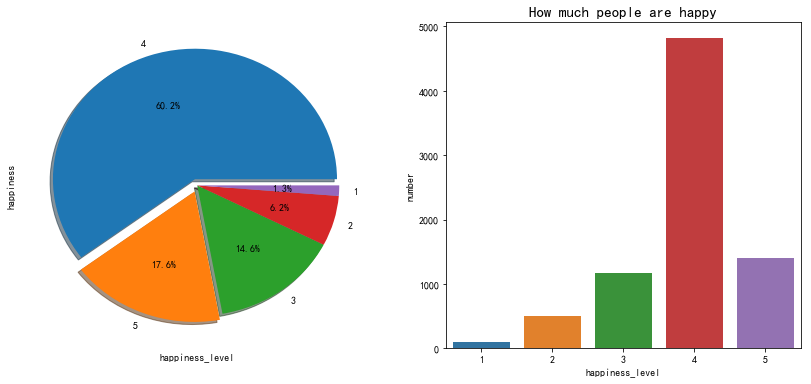

In [12]:
# 5个等级幸福感的柱状图，5个等级的占比图
f,ax=plt.subplots(1,2,figsize=(14,6))
# 部分分离开
explode = (0.05,0.05,0,0,0)
train['happiness'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True,explode=explode)
ax[0].set_xlabel('happiness_level')
# 用seaborn的计数图
sns.countplot('happiness',data=train,ax=ax[1])
# ax[1] = train['happiness'].value_counts().plot.bar()
ax[1].set_title('How much people are happy',fontsize=15)
ax[1].set_xlabel('happiness_level')
ax[1].set_ylabel('number')
plt.show() 

In [13]:
## 分性别分析,1男，2女
train.groupby(['gender', 'happiness'])['happiness'].count()

gender  happiness
1       1              43
        2             216
        3             596
        4            2306
        5             599
2       1              61
        2             281
        3             575
        4            2512
        5             811
Name: happiness, dtype: int64

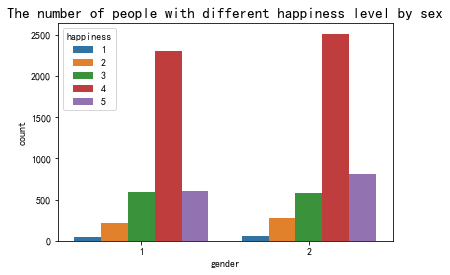

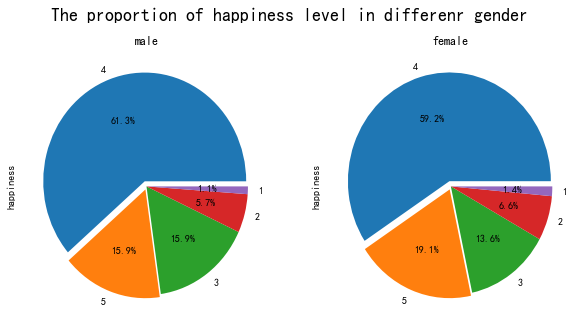

In [14]:
# 男女的幸福指数比较
# hue为色彩色度的意思，可以理解为hue决定具有多彩的标签
sns.countplot(x='gender', hue='happiness', data=train)
plt.title('The number of people with different happiness level by sex',fontsize=15)
# 在男性女性中，5个happiness level所占比例pie图
fig,ax1 = plt.subplots(1,2,figsize=(10,5))
# 部分分离开
explode = (0.05,0.03,0,0,0)
train['happiness'][train['gender']==1].value_counts().plot.pie(autopct='%1.1f%%', ax=ax1[0], explode=explode,title='male')
train['happiness'][train['gender']==2].value_counts().plot.pie(autopct='%1.1f%%', ax=ax1[1], explode=explode,title='female')
fig.suptitle('The proportion of happiness level in differenr gender', fontsize=18, verticalalignment='center')

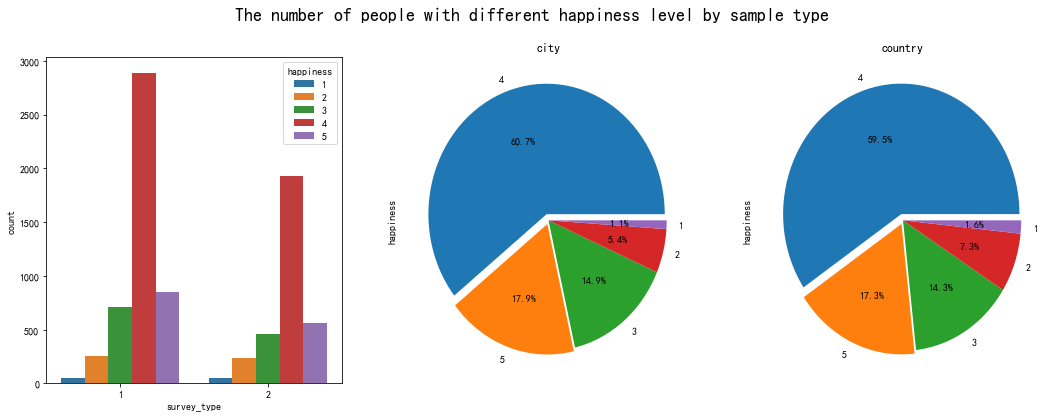

In [15]:
# 样本类型的幸福指数比较，1表示城市，2表示农村
f,ax=plt.subplots(1,3,figsize=(18,6))
sns.countplot(x='survey_type', hue='happiness', data=train, ax=ax[0])
# 在样本类型中，5个happiness level所占比例pie图
explode = (0.05,0.03,0,0,0)
train['happiness'][train['survey_type']==1].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[1], explode=explode,title='city')
train['happiness'][train['survey_type']==2].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[2], explode=explode,title='country')
f.suptitle('The number of people with different happiness level by sample type', fontsize=18, verticalalignment='center')

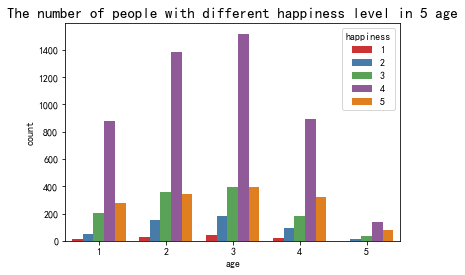

In [16]:
# 将年龄分阶段
## 按每个年龄阶段分析幸福感
# train.dtypes
combine=[train,test]
for dataset in combine:
    dataset.loc[(dataset['age'] > 16) & (dataset['age'] <= 32), 'age'] = 1
    dataset.loc[(dataset['age'] > 32) & (dataset['age'] <= 48), 'age'] = 2
    dataset.loc[(dataset['age'] > 48) & (dataset['age'] <= 64), 'age'] = 3
    dataset.loc[(dataset['age'] > 64) & (dataset['age'] <= 80), 'age'] = 4
    dataset.loc[ dataset['age'] > 80, 'age'] = 5 
sns.countplot('age',hue='happiness',data=train,palette='Set1')
plt.title('The number of people with different happiness level in 5 age',fontsize=15)
train['age'] = train['age'].astype(int)

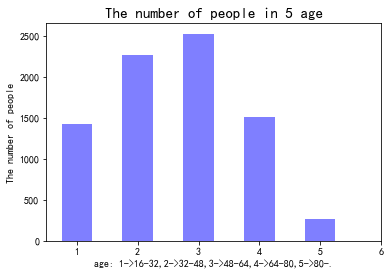

In [17]:
## 分年龄分析
# 绘制条形图，得到每个年龄段的频数
plt.hist(train['age'], range=(1,6), histtype='bar', align='left', color='blue',alpha=0.5)
plt.title('The number of people in 5 age',fontsize=15)
plt.xlabel('age: 1->16-32,2->32-48,3->48-64,4->64-80,5->80-.')
plt.ylabel('The number of people')

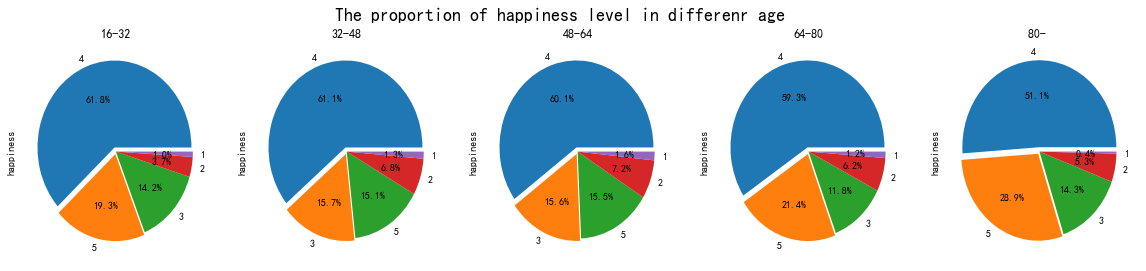

In [18]:
# 在各个年龄段中，5个happiness level所占比例pie图
fig,ax1 = plt.subplots(1,5,figsize=(20,4))
# 部分分离开
explode = (0.05,0.03,0,0,0)
train['happiness'][train['age']==1].value_counts().plot.pie(autopct='%1.1f%%', ax=ax1[0], explode=explode,title='16-32')
train['happiness'][train['age']==2].value_counts().plot.pie(autopct='%1.1f%%', ax=ax1[1], explode=explode,title='32-48')
train['happiness'][train['age']==3].value_counts().plot.pie(autopct='%1.1f%%', ax=ax1[2], explode=explode,title='48-64')
train['happiness'][train['age']==4].value_counts().plot.pie(autopct='%1.1f%%', ax=ax1[3], explode=explode,title='64-80')
train['happiness'][train['age']==5].value_counts().plot.pie(autopct='%1.1f%%', ax=ax1[4], explode=explode,title='80- ')
fig.suptitle('The proportion of happiness level in differenr age', fontsize=18, verticalalignment='center')

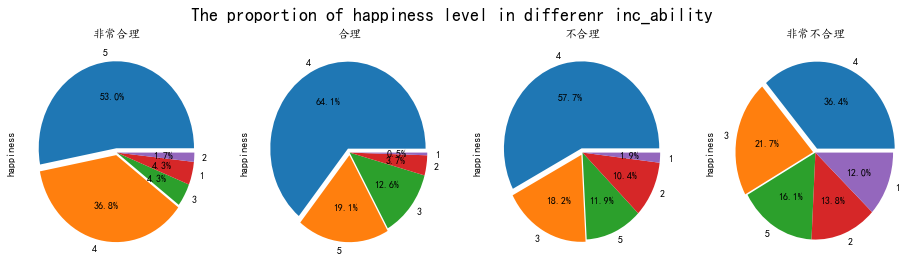

In [19]:
# 在收入合理四个阶段中，5个happiness level所占比例pie图
fig,ax1 = plt.subplots(1,4,figsize=(16,4))
explode = (0.05,0.03,0,0,0)
train['happiness'][train['inc_ability']==1].value_counts().plot.pie(autopct='%1.1f%%', ax=ax1[0], explode=explode,title='非常合理')
train['happiness'][train['inc_ability']==2].value_counts().plot.pie(autopct='%1.1f%%', ax=ax1[1], explode=explode,title='合理')
train['happiness'][train['inc_ability']==3].value_counts().plot.pie(autopct='%1.1f%%', ax=ax1[2], explode=explode,title='不合理')
train['happiness'][train['inc_ability']==4].value_counts().plot.pie(autopct='%1.1f%%', ax=ax1[3], explode=explode,title='非常不合理')
fig.suptitle('The proportion of happiness level in differenr inc_ability', fontsize=18, verticalalignment='center')

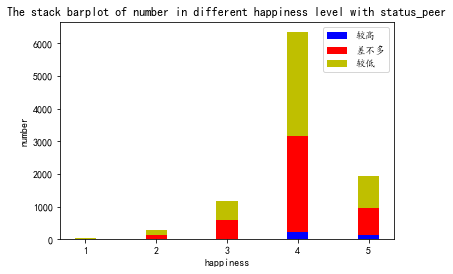

In [20]:
# 与同龄人比较社会经济地位，5个happiness level的堆叠条形图
index = np.arange(1,6)
x1 = train[train['status_peer']==1]['happiness'].groupby(train['happiness']).count()
x2 = train[train['status_peer']==2]['happiness'].groupby(train['happiness']).count()
x3 = train[train['status_peer']==3]['happiness'].groupby(train['happiness']).count()
width = 0.3
# bottom=x，表示从x的值开始堆叠上去
plt.bar(left=index, height=x1, width=width, color='b', label='较高')
plt.bar(left=index, height=x2, width=width, color='r', bottom=x1, label='差不多') 
plt.bar(left=index, height=x2, width=width, color='y', bottom=x2, label='较低') 
plt.xlabel('happiness')
plt.ylabel('number')
plt.title('The stack barplot of number in different happiness level with status_peer')
plt.legend(loc='best')
plt.show()

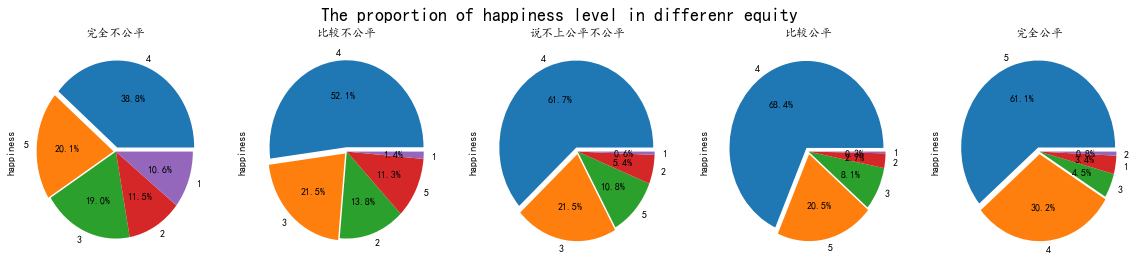

In [21]:
# 在社会公平5个阶段中，5个happiness level所占比例pie图
fig,ax1 = plt.subplots(1,5,figsize=(20,4))
explode = (0.05,0.03,0,0,0)
train['happiness'][train['equity']==1].value_counts().plot.pie(autopct='%1.1f%%', ax=ax1[0], explode=explode,title='完全不公平')
train['happiness'][train['equity']==2].value_counts().plot.pie(autopct='%1.1f%%', ax=ax1[1], explode=explode,title='比较不公平')
train['happiness'][train['equity']==3].value_counts().plot.pie(autopct='%1.1f%%', ax=ax1[2], explode=explode,title='说不上公平不公平')
train['happiness'][train['equity']==4].value_counts().plot.pie(autopct='%1.1f%%', ax=ax1[3], explode=explode,title='比较公平')
train['happiness'][train['equity']==5].value_counts().plot.pie(autopct='%1.1f%%', ax=ax1[4], explode=explode,title='完全公平')
fig.suptitle('The proportion of happiness level in differenr equity', fontsize=18, verticalalignment='center')

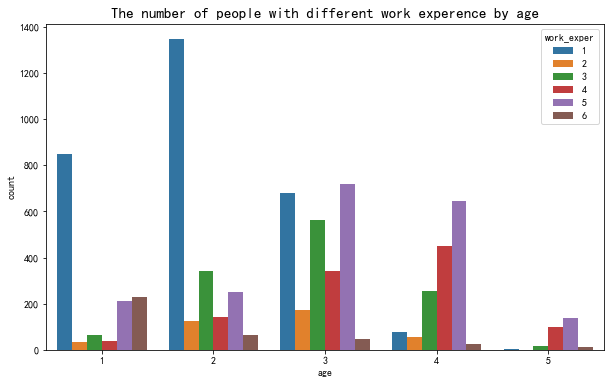

In [22]:
# 每个年龄段的具有不同工作经历的人数
f,ax = plt.subplots(1,1,figsize=(10,6))
sns.countplot('age',hue='work_exper', data=train)
plt.title('The number of people with different work experence by age',fontsize=15)

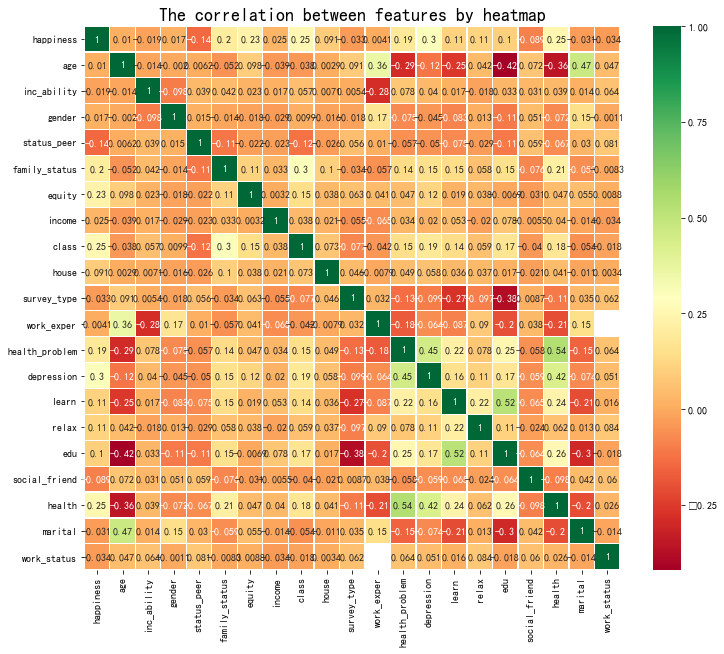

In [23]:
# 绘制热图，热图的用途: seaborn中的heatmap热力图可以得到数据表里多个特征两两的相关度（pearson相关系数计算的）
# data.corr()：得到关联矩阵，cmap: 从数字到色彩空间的映射，取值是matplotlib包里的colormap名称或颜色对象，
# annot(annotate的缩写): 默认取值False；如果是True，在热力图每个方格写入数据
# linewidths:定义热力图里“表示两两特征关系的矩阵小块”之间的间隔大小
#外界层面（物质）：age，inc_ability，gender，status_peer，family_status，equity，class，income，house，survey_type，
#个人层面（精神）：health，work_exper，health_problem，depression，learn，relax，edu，social_friend,marital,work_status
sns.heatmap(train[['happiness','age','inc_ability','gender','status_peer','family_status','equity','income','class','house','survey_type',
                   'work_exper','health_problem','depression','learn','relax','edu','social_friend','health','marital','work_status']].corr(),
            annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf() # 获取当前的figure
fig.set_size_inches(12,10) # 设置尺寸
plt.title('The correlation between features by heatmap',fontsize=18)
plt.show()

In [24]:
train.head()

,id,happiness,survey_type,province,city,county,survey_time,gender,birth,nationality,...,public_service_1,public_service_2,public_service_3,public_service_4,public_service_5,public_service_6,public_service_7,public_service_8,public_service_9,age
0,1,4,1,12,32,59,2015,1,1959,1,...,50,60,50,50,30.0,30,50,50,50,3
1,2,4,2,18,52,85,2015,1,1992,1,...,90,70,70,80,85.0,70,90,60,60,1
2,3,4,2,29,83,126,2015,2,1967,1,...,90,80,75,79,80.0,90,90,90,75,2
3,4,5,2,10,28,51,2015,2,1943,1,...,100,90,70,80,80.0,90,90,80,80,4
4,5,4,1,7,18,36,2015,2,1994,1,...,50,50,50,50,50.0,50,50,50,50,1


In [25]:
train.select_dtypes(include=['object']).head()

,edu_other,property_other,invest_other
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


In [26]:
dellist = ['edu_other','property_other','invest_other']
for i in dellist:
    del train[i]
    del test[i]

In [27]:
train.to_csv('happiness_train_clean.csv',index=0)
test.to_csv('happiness_test_clean.csv',index=0)

In [28]:
# train.dtypes